# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = '../data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 boxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [17]:
#1
"""
Your code here
"""
cut_rule = [-1, 0.99, 2, 5, 100]
result_label = ['0 child', '1-2 child', '3-5 child', '> 5 child']
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, labels= result_label)
app_train['CNT_CHILDREN_GROUP'].value_counts()

0 child      215371
1-2 child     87868
3-5 child      4230
> 5 child        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [14]:
#1-check
result = {'0':0, '1-2':0, '3-5':0, '>5':0}
for v in app_train['CNT_CHILDREN'].values:
    if v == 0:
        result['0']+=1
    elif v >= 1 and v <=2 :
        result['1-2']+=1
    elif v >= 3 and v <=5 :
        result['3-5']+=1
    else:
        result['>5']+=1
result    

{'0': 215371, '1-2': 87868, '3-5': 4230, '>5': 42}

In [15]:
#1-check
app_train['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [18]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
0 child             0         166747.010980
                    1         160804.210548
1-2 child           0         174590.584401
                    1         176115.362720
3-5 child           0         175053.742913
                    1         160677.385714
> 5 child           0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [23]:
#2-check
app_train.groupby(['CNT_CHILDREN_GROUP', 'TARGET'])['AMT_INCOME_TOTAL'].describe()

count           mean           std      min  \
CNT_CHILDREN_GROUP TARGET                                                   
0 child            0       198762.0  166747.010980  1.061799e+05  25650.0   
                   1        16609.0  160804.210548  8.483011e+04  25650.0   
1-2 child          0        80081.0  174590.584401  1.201981e+05  26550.0   
                   1         7787.0  176115.362720  1.327159e+06  27900.0   
3-5 child          0         3810.0  175053.742913  1.128427e+05  29250.0   
                   1          420.0  160677.385714  1.130315e+05  36000.0   
> 5 child          0           33.0  139159.090909  7.112483e+04  45000.0   
                   1            9.0  180000.000000  7.377118e+04  90000.0   

                                25%       50%       75%          max  
CNT_CHILDREN_GROUP TARGET                                             
0 child            0       112500.0  144000.0  202500.0   13500000.0  
                   1       112500.0  135000.0  202500.0    1890000.0  
1-2 child          0       112500.0  157500.0  211500.0   18000090.0  
                   1       112500.0  135000.0  202500.0  117000000.0  
3-5 child          0       112500.0  157500.0  202500.0    2250000.0  
                   1        96750.0  135000.0  185625.0    1350000.0  
> 5 child          0        90000.0  112500.0  180000.0     337500.0  
                   1       135000.0  180000.0  202500.0     315000.0

In [25]:
#2-check
app_train.groupby(['CNT_CHILDREN_GROUP', 'TARGET'])['AMT_INCOME_TOTAL'].size()

CNT_CHILDREN_GROUP  TARGET
0 child             0         198762
                    1          16609
1-2 child           0          80081
                    1           7787
3-5 child           0           3810
                    1            420
> 5 child           0             33
                    1              9
Name: AMT_INCOME_TOTAL, dtype: int64

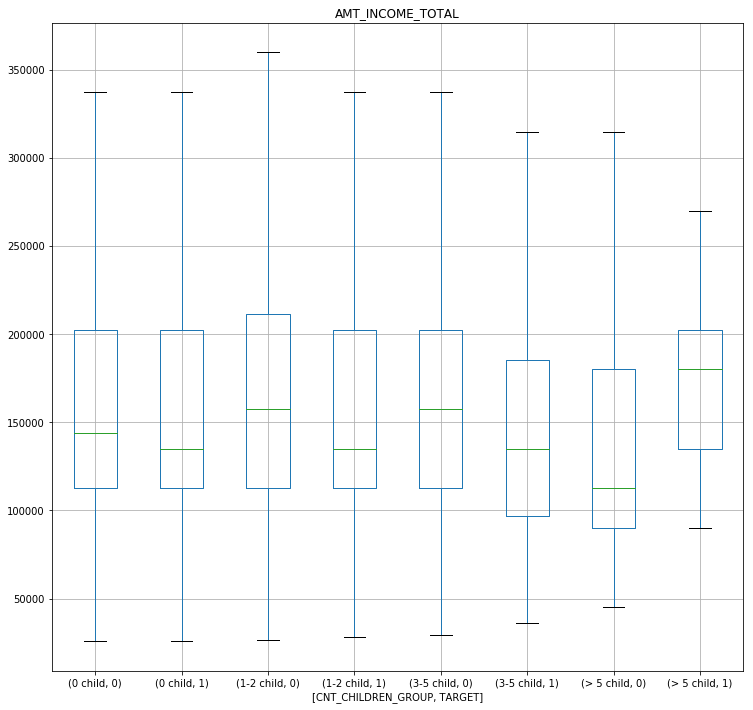

In [32]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

In [27]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x - x.mean())/x.std() )

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.491521
1,270000.0,0.972434
2,67500.0,-0.934706
3,135000.0,-0.298993
4,121500.0,-0.426135


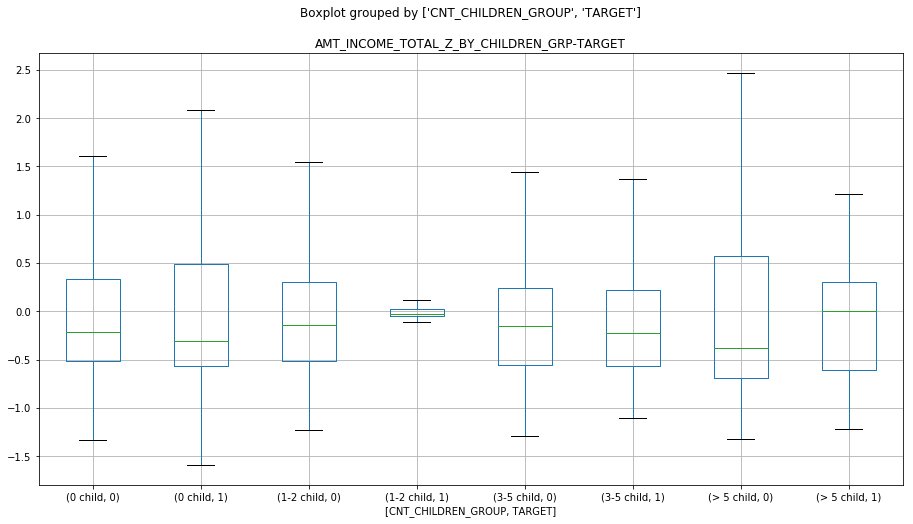

In [37]:
app_train.boxplot(column='AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET', by=['CNT_CHILDREN_GROUP', 'TARGET'],
                  showfliers = False, figsize=(15, 8))